In [1]:
import pandas as pd
from pprint import pprint

In [2]:
data = pd.read_csv("data.csv", index_col=0)

data.columns = data.columns.str.lower().str.replace(" ", "_")

bad_cols = ["club_logo", "photo", "flag", "loaned_from"]

data = data.drop(bad_cols, axis = 1)

In [3]:
data.shape

(18207, 84)

In [4]:
data.position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [5]:
data = data.query("position != 'GK'")

In [6]:
gk_cols = [i for i in data.columns if "gk" in i]
gk_cols

['gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes']

In [7]:
data = data.drop(gk_cols, axis = 1)

In [8]:
data.shape

(16182, 79)

In [9]:
data = data.set_index("id")

In [10]:
attribute_cols = data.columns[48:-1].tolist()

In [11]:
features = data[attribute_cols].copy()

In [12]:
features.dropna(inplace=True)
features.shape

(16134, 29)

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [14]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [15]:
scale = StandardScaler()
Xs = scale.fit_transform(features)

pca = PCA(.90)

Xp = pca.fit_transform(Xs)

In [16]:
pca.explained_variance_ratio_.cumsum()

array([0.39084111, 0.60440335, 0.70346449, 0.76415527, 0.79192565,
       0.81521776, 0.83396323, 0.85021057, 0.8648418 , 0.87817803,
       0.89118499, 0.90202515])

In [17]:
comps = pca.components_.T

In [64]:
K = 13
km = KMeans(K)
km.fit(comps)
silhouette_score(comps, km.labels_)

0.36952028803238457

In [65]:

spec = SpectralClustering(n_clusters=K)
spec.fit(comps)
silhouette_score(comps, spec.labels_)

0.31616182659397973

In [66]:

agg = AgglomerativeClustering(n_clusters=K)
agg.fit(comps)
silhouette_score(comps, agg.labels_)

0.3580893772190614

In [22]:
# comps = pd.DataFrame(comps, columns=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])

In [67]:
pd.value_counts(km.labels_)

11    4
7     4
3     4
1     3
12    2
9     2
4     2
2     2
0     2
10    1
8     1
6     1
5     1
dtype: int64

In [68]:
q = sorted(list(zip(features.columns, km.labels_)), key=lambda x:x[1])

In [69]:
w = {}
for i in range(K):
    r = []
    for e in q:
        if e[1] == i:
            r.append(e[0])
    w[str(i)] = r

In [74]:
print(pprint(w))

{'0': ['reactions', 'composure'],
 '1': ['shortpassing', 'longpassing', 'vision'],
 '10': ['strength'],
 '11': ['crossing', 'dribbling', 'ballcontrol', 'positioning'],
 '12': ['agility', 'balance'],
 '2': ['acceleration', 'sprintspeed'],
 '3': ['interceptions', 'marking', 'standingtackle', 'slidingtackle'],
 '4': ['headingaccuracy', 'penalties'],
 '5': ['jumping'],
 '6': ['aggression'],
 '7': ['finishing', 'volleys', 'shotpower', 'longshots'],
 '8': ['stamina'],
 '9': ['curve', 'fkaccuracy']}
None


In [79]:
data[['crossing', 'dribbling', 'ballcontrol', 'positioning']].corr()

,crossing,dribbling,ballcontrol,positioning
crossing,1.000000,0.712405,0.682915,0.585804
dribbling,0.712405,1.000000,0.851087,0.789104
ballcontrol,0.682915,0.851087,1.000000,0.718674
positioning,0.585804,0.789104,0.718674,1.000000


In [27]:
data[w["7"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

reactions    0.847722
composure    0.801772
Name: overall, dtype: float64

In [28]:
data[w["6"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

curve         0.503084
fkaccuracy    0.455811
Name: overall, dtype: float64

In [29]:
data[w["5"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

shortpassing    0.722615
ballcontrol     0.717802
longpassing     0.585374
vision          0.524665
stamina         0.461547
aggression      0.453405
strength        0.341123
agility         0.244126
jumping         0.228382
balance         0.059504
Name: overall, dtype: float64

In [30]:
data[w["4"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

shotpower    0.562941
longshots    0.502207
volleys      0.452038
finishing    0.373000
Name: overall, dtype: float64

In [31]:
data[w["3"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

sprintspeed     0.169926
acceleration    0.150621
Name: overall, dtype: float64

In [32]:
data[w["2"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

headingaccuracy    0.467296
penalties          0.390954
Name: overall, dtype: float64

In [33]:
data[w["1"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

interceptions     0.333576
marking           0.305991
standingtackle    0.264510
slidingtackle     0.224896
Name: overall, dtype: float64

In [34]:
data[w["0"]+["overall"]].corr()["overall"].sort_values(ascending=False).iloc[1:]

dribbling      0.516518
crossing       0.496814
positioning    0.438786
Name: overall, dtype: float64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [36]:
for col, comp in sorted(zip(features.columns, pca.components_[0]), key=lambda x:x[1], reverse=True)[:3]:
    print (col, comp)

dribbling 0.2665567752878971
ballcontrol 0.2609776188437448
longshots 0.2584181505798297


In [37]:
for col, comp in sorted(zip(features.columns, pca.components_[1]), key=lambda x:x[1], reverse=True)[:3]:
    print (col, comp)

acceleration 0.13068626179014264
finishing 0.11965837624185365
sprintspeed 0.11579158073459896


In [38]:
dd = {}

In [39]:
for i in range(pca.components_.shape[0]):
    s = sorted(zip(features.columns, pca.components_[i]), key=lambda x:x[1], reverse=True)[:3]
    vals = [r[0] for r in s]
    dd[str(i)] = vals

In [40]:
dd

{'0': ['dribbling', 'ballcontrol', 'longshots'],
 '1': ['acceleration', 'finishing', 'sprintspeed'],
 '2': ['headingaccuracy', 'strength', 'penalties'],
 '3': ['longpassing', 'fkaccuracy', 'vision'],
 '4': ['sprintspeed', 'strength', 'stamina'],
 '5': ['reactions', 'composure', 'shortpassing'],
 '6': ['sprintspeed', 'acceleration', 'headingaccuracy'],
 '7': ['reactions', 'balance', 'penalties'],
 '8': ['crossing', 'stamina', 'curve'],
 '9': ['longpassing', 'penalties', 'composure'],
 '10': ['composure', 'aggression', 'strength'],
 '11': ['shotpower', 'longshots', 'composure']}

In [41]:
players = data.loc[features.index, "name"]
players.shape

(16134,)

In [42]:
players.head()

id
158023             L. Messi
20801     Cristiano Ronaldo
190871            Neymar Jr
192985         K. De Bruyne
183277            E. Hazard
Name: name, dtype: object

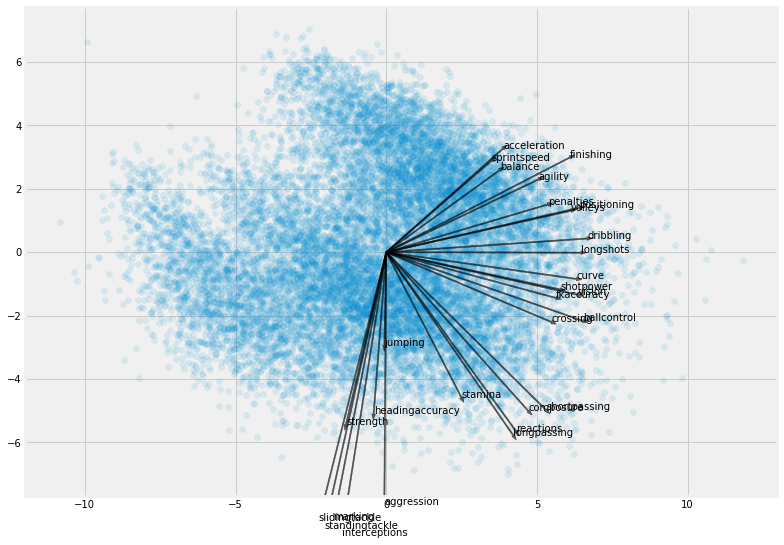

In [43]:
plt.figure(figsize=(12, 9))
# plt.axis([-1, 1, -1, 1])
for i in range(features.shape[1]):
    x = pca.components_[0][i]
    y = pca.components_[1][i]
    feature = features.columns[i]
    plt.arrow(0, 0, x*25, y*25, width = 0.04, color = "black", alpha =.6)
    plt.annotate(text = feature, xy =(x, y), xytext=(x*25, y*25))
    

plt.scatter(Xp[:, 0], Xp[:, 1], alpha=.1)

# for player in players:
#     data = nba_pca_df.loc[player]
#     plt.annotate(player, (Xp["pc1"], data["pc2"]))
    
    
plt.show()

In [48]:
from sklearn.cluster import AffinityPropagation

In [58]:
aff = AffinityPropagation(convergence_iter=30)
aff.fit(comps)

AffinityPropagation(affinity='euclidean', convergence_iter=30, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [59]:
silhouette_score(comps, aff.labels_)

0.19915552325386057

In [60]:
pd.value_counts(aff.labels_)

1    10
7     4
5     4
2     4
0     4
6     1
4     1
3     1
dtype: int64

In [61]:
# AffinityPropagation()

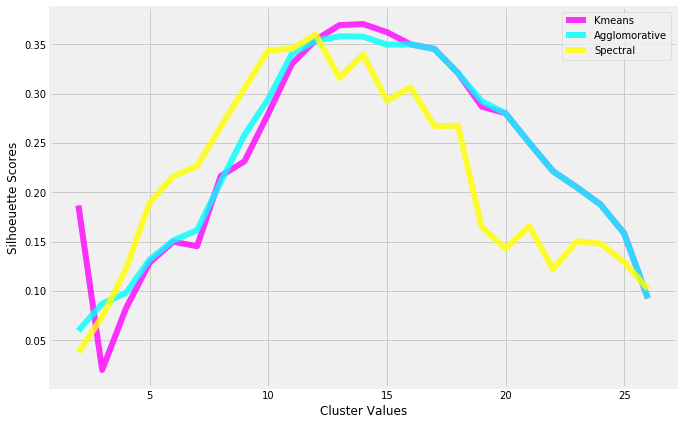

In [45]:
cluster_range = range(2, 27)

#Intialize list to store silhouette scores

kmeans_s_scores = []
agg_s_scores = []
spec_s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    kmeans = KMeans(n_clusters=cluster)
    agg = AgglomerativeClustering(n_clusters=cluster)
    spec = SpectralClustering(n_clusters=cluster)
    
    kmeans.fit(comps)
    agg.fit(comps)
    spec.fit(comps)
    
    kmeans_labels = kmeans.labels_
    agg_labels = agg.labels_
    spec_labels = spec.labels_
    
    kmeans_score = silhouette_score(comps, kmeans_labels)
    agg_score = silhouette_score(comps, agg_labels)
    spec_score = silhouette_score(comps, spec_labels)
    
    kmeans_s_scores.append(kmeans_score)
    agg_s_scores.append(agg_score)
    spec_s_scores.append(spec_score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, kmeans_s_scores, linewidth = 6, alpha = .8, c = "magenta", label = "Kmeans")
plt.plot(cluster_range, agg_s_scores, linewidth = 6, alpha = .8, c = "cyan", label = "Agglomorative")
plt.plot(cluster_range, spec_s_scores, linewidth = 6, alpha = .8, c = "yellow", label = "Spectral")
plt.xlabel("Cluster Values")
plt.ylabel("Silhoeuette Scores")
plt.legend();

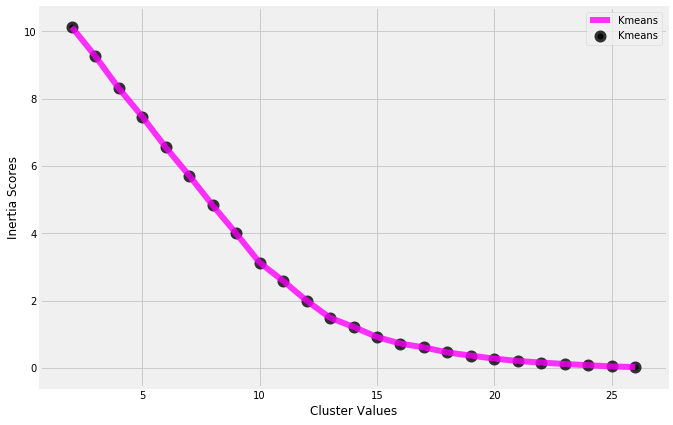

In [63]:
cluster_range = range(2, 27)

#Intialize list to store silhouette scores

kmeans_s_scores = []
agg_s_scores = []
spec_s_scores = []

#Iterate over cluster range, fit models and add score to s_scores

for cluster in cluster_range:
    kmeans = KMeans(n_clusters=cluster)
#     agg = AgglomerativeClustering(n_clusters=cluster)
#     spec = SpectralClustering(n_clusters=cluster)
    
    kmeans.fit(comps)
#     agg.fit(comps)
#     spec.fit(comps)
    
    kmeans_score = kmeans.inertia_
#     agg_score = agg.inertia_
#     spec_score = spec.inertia_
    
    kmeans_s_scores.append(kmeans_score)
#     agg_s_scores.append(agg_score)
#     spec_s_scores.append(spec_score)
    
#Plot clusters versus scores

plt.figure(figsize=(10, 7))
plt.plot(cluster_range, kmeans_s_scores, linewidth = 6, alpha = .8, c = "magenta", label = "Kmeans")
plt.scatter(cluster_range, kmeans_s_scores, linewidth = 6, alpha = .8, c = "black", label = "Kmeans")
# plt.plot(cluster_range, agg_s_scores, linewidth = 6, alpha = .8, c = "cyan", label = "Agglomorative")
# plt.plot(cluster_range, spec_s_scores, linewidth = 6, alpha = .8, c = "yellow", label = "Spectral")
plt.xlabel("Cluster Values")
plt.ylabel("Inertia Scores")
plt.legend();

In [47]:
spec.affinity_matrix_

array([[1.        , 0.49329428, 0.33951895, 0.41197941, 0.50905167,
        0.73758898, 0.72573358, 0.4794575 , 0.35331333, 0.60824659,
        0.44618505, 0.38565689, 0.49926168, 0.38871421, 0.30814233,
        0.26090712, 0.25341444, 0.22417598, 0.39249598, 0.40045519,
        0.2376641 , 0.55682425, 0.66133711, 0.55885637, 0.29639703,
        0.28350587, 0.50335694, 0.55280212, 0.55766601],
       [0.49329428, 1.        , 0.5584972 , 0.58552876, 0.92005466,
        0.81352758, 0.58947344, 0.44771084, 0.47450375, 0.7915467 ,
        0.5510354 , 0.47719969, 0.6677292 , 0.55792878, 0.5343116 ,
        0.69673618, 0.32198   , 0.36238307, 0.50230584, 0.8564095 ,
        0.31618973, 0.61400356, 0.83821441, 0.79779976, 0.51042852,
        0.43687336, 0.59983193, 0.59356202, 0.58156034],
       [0.33951895, 0.5584972 , 1.        , 0.47111035, 0.54114817,
        0.49731722, 0.34865965, 0.28696355, 0.34526916, 0.55969398,
        0.41147507, 0.39648241, 0.36908316, 0.51148088, 0.27933154,
  